<a href="https://colab.research.google.com/github/ahmedbasemdev/PyTorch-Tutorial/blob/main/12_Feed_Forward_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [32]:
# device config

device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
device.type

'cuda'

### hyper Parameter

In [33]:
inputSize = 784 # our images have size 28 * 28 , then we will flaten this array to be a 1D tensor
hiddenState = 100
nClasses = 10 # we have digit form 0 to 9
nEpochs = 2
batchSize = 100
learningRate = 0.001

## Load Data

In [34]:
trainData = torchvision.datasets.MNIST(root='./data',train=True,
                                       transform=transforms.ToTensor(),download=True)
testData = torchvision.datasets.MNIST(root='./data',train=False,
                                       transform=transforms.ToTensor())

In [35]:
trainLoader = torch.utils.data.DataLoader(dataset=trainData , batch_size=batchSize , shuffle=True)
testLoader = torch.utils.data.DataLoader(dataset=testData , batch_size = batchSize , shuffle=True)

In [36]:
examples = iter(trainLoader)
samples , labels = next(examples)
print(samples.shape , labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


batch size , color channel , height , width

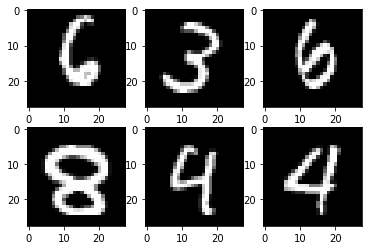

In [37]:
for i in range(6):
  plt.subplot(2,3,i +1 )
  plt.imshow(samples[i][0],cmap='gray')

In [38]:
class NeuralNet(nn.Module):

  def __init__(self,inputSize,hiddenState , numClasses):
    super(NeuralNet,self).__init__()

    self.inputSize = inputSize
    self.linear1 = nn.Linear(inputSize, hiddenState) 
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hiddenState, numClasses)  

    
  
  def forward(self,x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)
    return out

In [39]:
model = NeuralNet(inputSize , hiddenState,nClasses).to(device)

## Loss and Optimizer

In [40]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters() , lr=learningRate)

## Training Loop

In [41]:
nTotalSteps = len(trainLoader)
nTotalSteps

600

In [43]:
for epoch in range(nEpochs):

  for i , (images , labels) in enumerate(trainLoader):

    # to device pushes the tensor to the gpu if avaible
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)


    outputs  = model(images)

    loss = criterion(outputs,labels)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if (i+1) % 100 == 0:
      print(f"epoch {epoch+1} / {nEpochs} , step {i+1}/{nTotalSteps} , Loss= {loss.item():.4f}")



epoch 1 / 2 , step 100/600 , Loss= 0.4901
epoch 1 / 2 , step 200/600 , Loss= 0.3259
epoch 1 / 2 , step 300/600 , Loss= 0.2537
epoch 1 / 2 , step 400/600 , Loss= 0.2821
epoch 1 / 2 , step 500/600 , Loss= 0.2331
epoch 1 / 2 , step 600/600 , Loss= 0.3124
epoch 2 / 2 , step 100/600 , Loss= 0.2627
epoch 2 / 2 , step 200/600 , Loss= 0.1494
epoch 2 / 2 , step 300/600 , Loss= 0.1298
epoch 2 / 2 , step 400/600 , Loss= 0.2572
epoch 2 / 2 , step 500/600 , Loss= 0.1606
epoch 2 / 2 , step 600/600 , Loss= 0.0929


In [51]:
with torch.no_grad():
  nCorrect = 0
  nSamples = 0

  for images , labels in testLoader:
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)

    outputs = model(images)

    # returns the value , index we are interseted in the actual index
    _ , prediction = torch.max(outputs,1)


    nSamples += labels.shape[0]

    nCorrect += (prediction == labels).sum().item()
  accuracy = 100* (nCorrect / nSamples)

  print(f"accuracy = {accuracy}")


accuracy = 95.78
